In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


# Import librarys

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_percentage_error


# Data Context


In [3]:
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [5]:
# Defining our scope

features = ["Open", "Low", "Volume_BTC", "Volume_USD"]
target = "High"

# Renaming for ease

df.rename(columns = {'Volume_(Currency)':'Volume_USD', 'Volume_(BTC)':'Volume_BTC'}, inplace = True)

# Reduce df to scope

df = df[features + [target]]

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Open        float64
 1   Low         float64
 2   Volume_BTC  float64
 3   Volume_USD  float64
 4   High        float64
dtypes: float64(5)
memory usage: 185.3 MB


In [7]:
df.isna().sum()

Open          1243608
Low           1243608
Volume_BTC    1243608
Volume_USD    1243608
High          1243608
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isna().sum()

Open          0
Low           0
Volume_BTC    0
Volume_USD    0
High          0
dtype: int64

In [8]:
df.shape

(3613769, 5)

In [9]:
df.drop_duplicates(inplace=True)                                       # Let's remove duplicates, how many rows now?
df.shape

(3581412, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3581412 entries, 0 to 4857376
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Open        float64
 1   Low         float64
 2   Volume_BTC  float64
 3   Volume_USD  float64
 4   High        float64
dtypes: float64(5)
memory usage: 163.9 MB


# Data Preprocessing


In [11]:
fcols = df.select_dtypes('float').columns
icols = df.select_dtypes('integer').columns

df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3581412 entries, 0 to 4857376
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Open        float64
 1   Low         float64
 2   Volume_BTC  float32
 3   Volume_USD  float64
 4   High        float64
dtypes: float32(1), float64(4)
memory usage: 150.3 MB


# Train Test Split


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

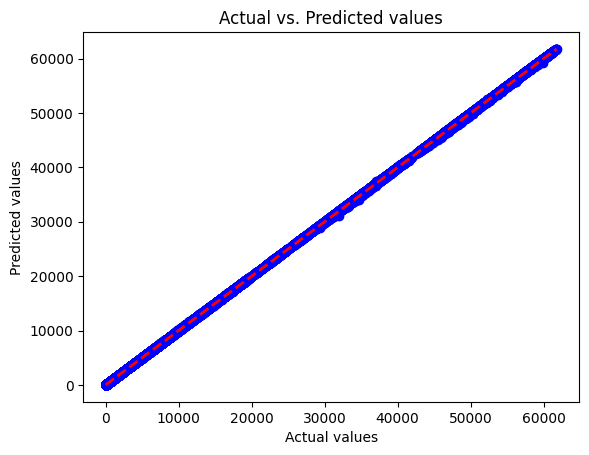

In [19]:
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

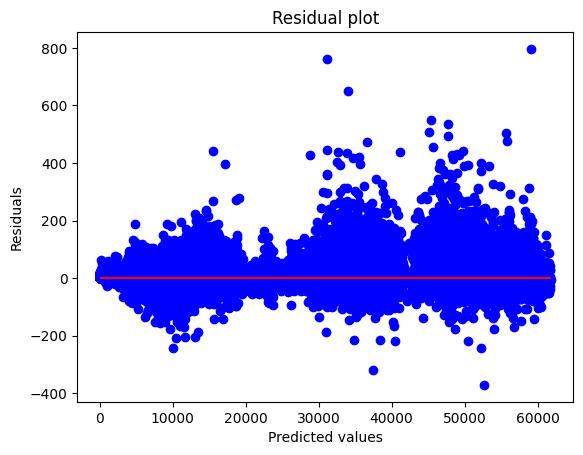

In [18]:
y_prediction = model.predict(x_test)
residuals = y_test - y_prediction

plt.scatter(y_prediction, residuals, color='blue')
plt.hlines(y=0, xmin=0, xmax=max(y_prediction), color='red')
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# The End